In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib
import cooler

In [2]:
cooler_file = '/pollard/data/wynton/consortia/4DN/rao2014/GM12878/4DNFIXP4QG5B.mcool'
# cooler_file = '/pollard/data/wynton/consortia/4DN/krietenstein2020/H1-hESC/4DNFI9GMP2J8.mcool'

In [3]:
# load cooler, obtain bin table
resolution = 50000
c = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))
chromsizes = c.chromsizes      
bins = c.bins()[:]

In [4]:
chr19_mat = c.matrix(balance=True).fetch('chr19')

In [5]:
hmm_track = pd.read_csv('../annotations/GM12878_hg38_50kb.csv')
# hmm_track = pd.read_csv('../annotations/H1-hESC_hg38_50kb.csv')
hmm_track.head()

,Unnamed: 0,chrom,start,end,KR,VC,VC_SQRT,weight,GC,E1,E2,E3,binary,HMM2,HMM3,HMM3P
0,0,chr1,0,50000,0.012247,0.001838,0.032337,NaN,0.484250,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,chr1,50000,100000,0.047586,0.010207,0.076204,NaN,0.376740,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,chr1,100000,150000,0.050368,0.015204,0.093003,NaN,0.429960,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,chr1,150000,200000,0.059842,0.013402,0.087317,NaN,0.486340,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,chr1,200000,250000,NaN,0.000232,0.011488,NaN,0.480564,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:


def plotmap(mat, hmm_track, start1, end1, start2, end2, chrom, hmm=False):
    fig= plt.figure(figsize = (10, 10))
    
    pallete={ 'HMM3':np.array([2, 5, 8, 5, 5, 5]), 'binary': np.array([2, 8, 5,5,5,5]), 'HMM3P': np.array([8, 6, 5,3,2,5])}
    

    
    if hmm:
        y_sig = hmm_track[hmm_track.chrom == chrom][hmm].values
        y_sig_max= np.nanmax(y_sig)

    gs = gridspec.GridSpec(20, 20, wspace=2, hspace=2)

    ax0= plt.subplot(gs[2:, 0:2])
    if hmm:
        y0 = np.tile(y_sig[start2:end2].reshape(-1,1), (1, 5))
        y0[y0!=y0] = 5
        y0=y0.astype(int)
        y0_c = pallete[hmm][y0]
        ax0.matshow(y0_c,cmap="RdYlBu", vmin=0, vmax=10, aspect='auto')
        ax0.axis('off')
        
    ax0.margins(0)
    ax0.xaxis.tick_top()
    ax0.yaxis.tick_right()
    plt.yticks(rotation=90)




    ax1= plt.subplot(gs[0:2, 2:])
    if hmm:
        y1= np.tile(y_sig[start1:end1].reshape(1,-1), (5, 1))
        y1[y1!=y1] = 5
        y1=y1.astype(int)
        y1_c = pallete[hmm][y1]
        ax1.matshow(y1_c, cmap="RdYlBu", vmin=0, vmax=10, aspect='auto')
        ax1.axis('off')
    ax1.margins(0)
    ax1.set_xlabel('Position along Chr19 (100Kb)')


    ax2 = plt.subplot(gs[2:, 2:])
    ax2.matshow(np.log(mat[start2:end2, start1:end1] + 5e-6), cmap = 'YlOrRd', aspect='auto', interpolation ='none')

    if hmm:
        vlines = (np.where(np.abs(np.diff(y_sig[start1:end1]))>0)[0]+1)
        hlines = (np.where(np.abs(np.diff(y_sig[start2:end2]))>0)[0]+1)
        ax2.vlines(vlines, ymin=0, ymax=(end2-start2), colors='black', linestyles='dotted')
        ax2.hlines(hlines, xmin=0, xmax=(end2-start2), colors='black', linestyles= 'dotted')
    plt.xlim([0, (end2-start2)])
    plt.ylim([(end1-start1), 0])
    ax2.axis('off')

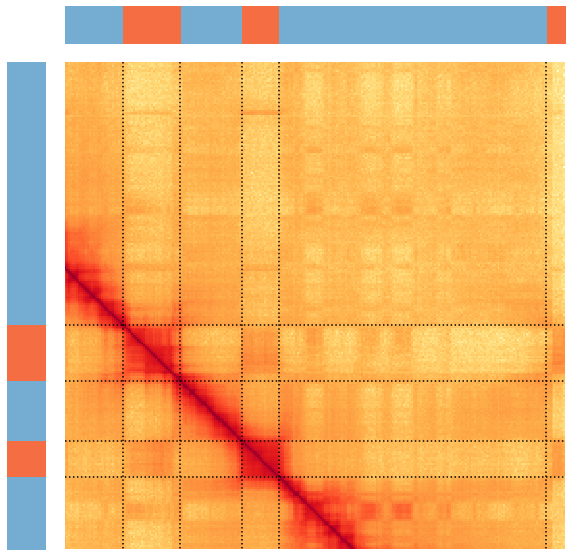

In [7]:
%matplotlib inline
chrom = 'chr19'
hmm= 'binary'

start1, end1 = 140, 400
start2, end2 = 30, 290
plotmap(chr19_mat, hmm_track, start1, end1, start2, end2, chrom, hmm)

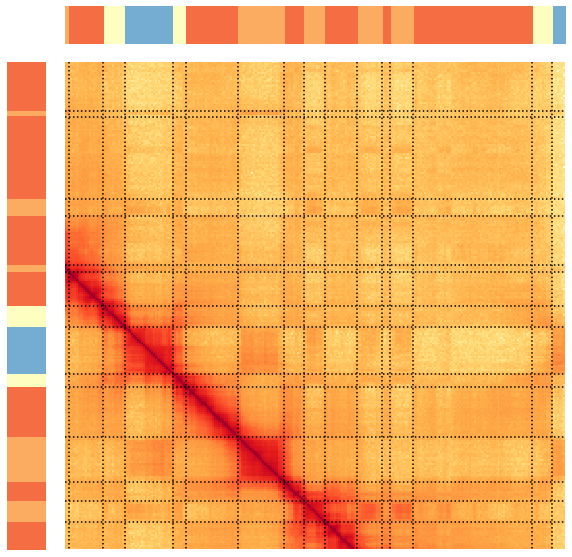

In [8]:
chrom = 'chr19'
hmm= 'HMM3P'

start1, end1 = 140, 400
start2, end2 = 30, 290
plotmap(chr19_mat, hmm_track, start1, end1, start2, end2, chrom, hmm)

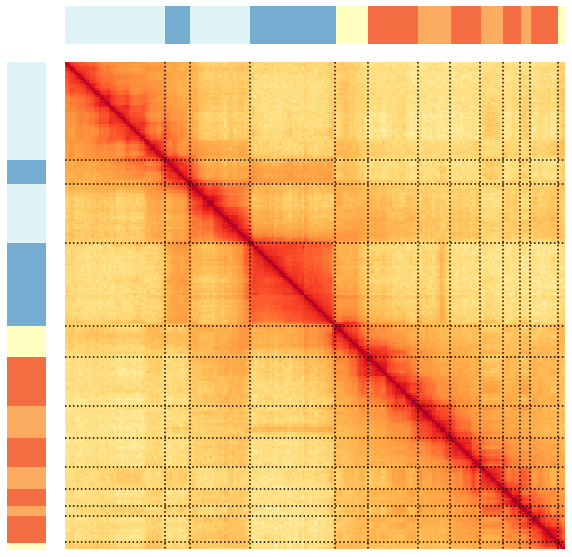

In [9]:
%matplotlib inline
chrom = 'chr19'
hmm= 'HMM3P'

start1, end1 = 650, 850
start2, end2 = 650, 850
plotmap(chr19_mat, hmm_track, start1, end1, start2, end2, chrom, hmm)

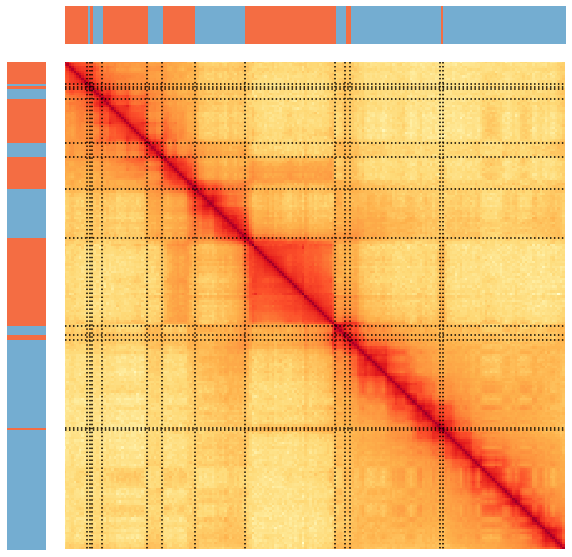

In [10]:
%matplotlib inline
chrom = 'chr19'
hmm= 'binary'

start1, end1 = 650, 850
start2, end2 = 650, 850
plotmap(chr19_mat, hmm_track, start1, end1, start2, end2, chrom, hmm)